In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
def get_pkl_data_to_df(file_dic, exp_name, num_index):
    rewards = {} # scores is an empty dict already
#     file_dic = "./learning_curves/ma_s1_e1_agrewards.pkl"
    if os.path.getsize(file_dic) > 0:      
        with open(file_dic, "rb") as f:
            unpickler = pickle.Unpickler(f)
            # if file is not empty scores will be equal
            # to the value unpickled
            rewards = unpickler.load()
    data_df = pd.DataFrame()
    if os.path.getsize(file_dic) > 0:
        num_agent = int(len(rewards)/num_index)
        # print(num_agent)
        data_df["index"] = [i for i in range(num_index)] * (num_agent + 1)
        reward_list = []
        type_list = []
        mean_reward_array = np.array([0.0]*num_index)
        for agent in range(num_agent):
            agent_reward_list = [rewards[i] for i in range(agent, num_index*num_agent, num_agent)]
            reward_list += agent_reward_list
            mean_reward_array += np.array(agent_reward_list)
            type_list += ["agent" + str(agent)] * num_index
        reward_list += mean_reward_array.tolist()
        type_list += ["mean_reward"] * num_index
        data_df["reward"] = reward_list
        data_df["type"] = type_list
        data_df["exp"]= [exp_name] * num_index * (num_agent + 1)
    return data_df

In [33]:
def get_plot_data(pkl_file_path =  "./learning_curves/", alg_name = "ma", s_name = "s1", num_index = 60, num_exp = 3):
    file_dic = pkl_file_path + alg_name + "_" + s_name + "_e02_agrewards.pkl"
    data_df = get_pkl_data_to_df(file_dic, "e02", num_index)
    print(file_dic)
    if num_exp < 10:
        exp_list = ["e0" + str(i) for i in range(2,num_exp+1,1)]
    else:
        exp_list = ["e0" + str(i) for i in range(2,10,1)] + ["e" + str(i) for i in range(10,num_exp+1,1)]
    for exp_name in exp_list:
        exp_file_dic = pkl_file_path + alg_name + "_" + s_name + "_" + exp_name + "_agrewards.pkl"
        data_df = data_df.append(get_pkl_data_to_df(exp_file_dic, exp_name, num_index))
    data_df["scenario"] = [s_name] * len(data_df)
    return data_df

In [48]:
s_name = "s8"
data_df = get_plot_data(pkl_file_path =  "./learning_curves/", 
                                     alg_name = "ma", 
                                     s_name = s_name, 
                                     num_index = 60,
                                     num_exp = 1)
# data_df

./learning_curves/ma_s8_e02_agrewards.pkl


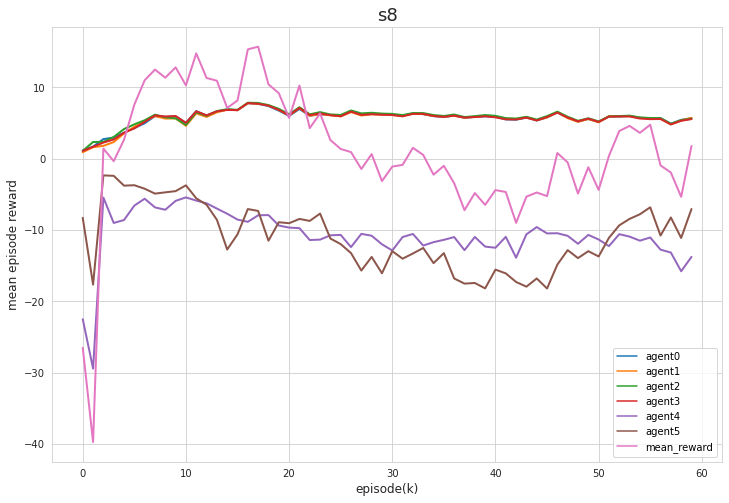

In [49]:
f = plt.figure(figsize=(12, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=data_df, x='index', y='reward', hue = "type", ci = 100, lw=2)
plt.title(s_name, fontsize=18)
plt.xlabel('episode(k)',fontsize=12)# x轴标签
plt.ylabel('mean episode reward', fontsize=12)# y轴标签
plt.legend(loc='best')
plt.savefig('plots/' + s_name + '_02.png',dpi=800)
plt.show()